# GWR paper - Colombia

This code accompanies the paper PAPER NAME TO BE DETERMINED, by German Vargas from UNESCO Institute for Educational Planning. The document can be downloaded from LINK TO THE PAPER, and the accompanying data can be obtained here: https://box.iiep.unesco.org/index.php/s/crXXYgk35YqEpr4

Note that the information used for the construction of this example is available free of charge, but a permission needs to be requested by emailing datoscede@uniandes.edu.co. Open receiving permission from this email, it can be forwarded to development@iiep.unesco.org, and the password for accessing to the folder will be provided. For more information on the data source, visit https://datoscede.uniandes.edu.co/es/catalogo-de-microdata

For any referencing, please use BIBLIOGRAPHICAL REFERENCING.

Installing all the packages that will be needed, and loading them into the R kernel. Note that install.packages has been commented out, and should be uncommented as needed.

In [1]:
options(warn = -1) 
#install.packages("GWmodel")
library("GWmodel") 
#install.packages("gwrr")
library("gwrr")
#install.packages("sp")
library("sp")
#install.packages("gstat")
library("gstat")
#install.packages("ModelMap")
library("ModelMap")
#install.packages("RColorBrewer")
library("RColorBrewer")
#install.packages("ape")
library("ape")
#install.packages("usdm")
library("usdm")
#install.packages("rgdal")
library("rgdal")
#install.packages("tidyr")
library("tidyr")
#install.packages("MASS")
library("MASS")
#install.packages("Compositional")
library("Compositional")
#install.packages("dplyr")
library("dplyr")
#install.packages("spatialEco")
library("spatialEco")
#install.packages("broom")
library("broom")

Loading required package: maptools

Loading required package: sp

Checking rgeos availability: TRUE

Loading required package: robustbase

Loading required package: Rcpp

Loading required package: spatialreg

Loading required package: spData

To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`

Loading required package: Matrix

Registered S3 methods overwritten by 'spatialreg':
  method                   from 
  residuals.stsls          spdep
  deviance.stsls           spdep
  coef.stsls               spdep
  print.stsls              spdep
  summary.stsls            spdep
  print.summary.stsls      spdep
  residuals.gmsar          spdep
  deviance.gmsar           spdep
  coef.gmsar               spdep
  fitted.gmsar             spdep
  print.gmsar              spdep
  summary.gmsar            spdep
  print.summary.gmsar      spdep
  print.lagmess            spdep
  sum

Determining the working directory, which should have the same structure as the one found in in the Replication folder.
This needs to be changes to the user's folder. Note that Windows uses backslashed (\), while Mac uses forward-slash (/). The code needs to be changed accordingly. 

In [2]:
setwd("C:\\Users\\g.vargas\\BOX\\IIEP_MyProjects\\MP_01000298\\WorkFiles_Experts\\298-Issue-Papers\\298-Issue-Paper-GWR\\Replication files")

### Importing the data extracted from QGIS

Note that the file should be saved under the Data\Colombia folder. 

In [3]:
PolygonShape <- readOGR(dsn = "Data\\Colombia", layer = "GWR - Colombia", drop_unsupported_fields=FALSE, disambiguateFIDs=TRUE)
cat(" ")
cat("The final names of the variables that were imported are the following:")

colnames(PolygonShape@data)

OGR data source with driver: ESRI Shapefile 
Source: "C:\Users\g.vargas\BOX\IIEP_MyProjects\MP_01000298\WorkFiles_Experts\298-Issue-Papers\298-Issue-Paper-GWR\Replication files\Data\Colombia", layer: "GWR - Colombia"
with 1117 features
It has 345 fields
Integer64 fields read as strings:  Key CV_ano CV_Violenc CV_conflic CV_confl_1 CV_confl_2 CV_poblind CV_ocupesp CV_asalt_p CV_incur_p CV_terrori CV_secuest CV_pirater CV_reten_i CV_hostig_ CV_ataq_in CV_ataq_ae CV_acc_sub CV_embosca CV_cont_ar CV_homic_v CV_homic_c CV_homicid CV_homi_tr CV_captura CV_captu_G CV_captu_E CV_captu_F CV_coca CV_o_amena CV_o_despl CV_d_amena CV_d_despl CV_desplaz CV_despl_1 CV_hurto_p CV_hurto_r CV_hurto_a CV_hurto_m CV_hurto_c CV_hurto_e CV_hurto_v CV_hurto E_ano E_pobsimpl E_pobsim_1 E_t_establ E_t_esta_1 E_t_esta_2 E_jornada_ E_jornad_1 E_jornad_2 E_jornad_3 E_jornad_4 E_jornad_5 E_jornad_6 E_jornad_7 E_jornad_8 E_admin_to E_admin__1 E_admin__2 E_admin__3 E_admin_m E_admin_h E_docen_to E_docen_of E_docen_

[1] "fid"        "admin0Name" "admin0Pcod" "admin1Name" "admin1Pcod"
  [6] "admin2Name" "admin2Pcod" "admin2RefN" "admin2AltN" "admin2Al_1"
 [11] "date"       "validOn"    "validTo"    "Shape_Leng" "Shape_Area"
 [16] "Key"        "Long"       "Lat"        "MurderRate" "Poverty"   
 [21] "ProxyGDP"   "ICFES_GPI"  "TransEducP" "TransAlimE" "SISBEN1PC" 
 [26] "CV_fid"     "CV_ano"     "CV_Violenc" "CV_conflic" "CV_confl_1"
 [31] "CV_confl_2" "CV_poblind" "CV_ocupesp" "CV_asalt_p" "CV_incur_p"
 [36] "CV_terrori" "CV_secuest" "CV_pirater" "CV_reten_i" "CV_hostig_"
 [41] "CV_ataq_in" "CV_ataq_ae" "CV_acc_sub" "CV_embosca" "CV_cont_ar"
 [46] "CV_homic_v" "CV_homic_c" "CV_homicid" "CV_homi_tr" "CV_captura"
 [51] "CV_captu_G" "CV_captu_E" "CV_captu_F" "CV_coca"    "CV_o_amena"
 [56] "CV_o_despl" "CV_d_amena" "CV_d_despl" "CV_desplaz" "CV_despl_1"
 [61] "CV_hurto_p" "CV_hurto_r" "CV_hurto_a" "CV_hurto_m" "CV_hurto_c"
 [66] "CV_hurto_e" "CV_hurto_v" "CV_hurto"   "E_fid"      "E_ano"     
 [71] "E_pobsimpl" "E_pobsim_1" "E_t_establ" "E_t_esta_1" "E_t_esta_2"
 [76] "E_jornada_" "E_jornad_1" "E_jornad_2" "E_jornad_3" "E_jornad_4"
 [81] "E_jornad_5" "E_jornad_6" "E_jornad_7" "E_jornad_8" "E_admin_to"
 [86] "E_admin__1" "E_admin__2" "E_admin__3" "E_admin_m"  "E_admin_h" 
 [91] "E_docen_to" "E_docen_of" "E_docen_ru" "E_docen_ur" "E_docen_pr"
 [96] "E_docen__1" "E_docen_se" "E_docen_me" "E_docen_mp" "E_docen__2"
[101] "E_docen_ms" "E_docen_mm" "E_docen_hp" "E_docen__3" "E_docen_hs"
[106] "E_docen_hm" "E_alumn_to" "E_alumn_of" "E_alumn_ru" "E_alumn_ur"
[111] "E_alumn_pr" "E_alumn__1" "E_alumn_se" "E_alumn_me" "E_alumn__2"
[116] "E_alumn__3" "E_alumn__4" "E_alumn__5" "E_alumn__6" "E_alumn__7"
[121] "E_alumn__8" "E_alumn__9" "E_alumn_10" "E_alumn_11" "E_alumn_12"
[126] "E_alumn_13" "E_alumn_mp" "E_alumn_14" "E_alumn_ms" "E_alumn_mm"
[131] "E_alumn_mj" "E_alumn_hp" "E_alumn_15" "E_alumn_hs" "E_alumn_hm"
[136] "E_alumn_hj" "E_s11_tota" "E_s11_mate" "E_s11_soci" "E_s11_cien"
[141] "E_s11_lect" "E_s11_ingl" "E_s11_to_1" "E_s11_to_2" "E_s11_to_3"
[146] "E_s11_to_4" "E_s11_to_5" "E_s11_to_6" "E_s11_to_7" "E_s11_to_8"
[151] "E_s11_to_9" "E_s11_to10" "E_s11_to11" "E_s11_to12" "E_s11_to13"
[156] "E_s11_to14" "E_s11_to15" "E_s11_to16" "E_s11_to17" "E_s11_to18"
[161] "E_n_icfes"  "E_col_tota" "E_col_to_1" "E_col_to_2" "E_col_B"   
[166] "E_col_C"    "E_col_D"    "E_col_B_o"  "E_col_C_o"  "E_col_D_o" 
[171] "E_col_B_ca" "E_col_C_ca" "E_col_D_ca" "GC_fid"     "GC_coddept"
[176] "GC_codprov" "GC_depto"   "GC_provinc" "GC_municip" "GC_ano"    
[181] "GC_ao_crea" "GC_act_adm" "GC_gandina" "GC_gcaribe" "GC_gpacifi"
[186] "GC_gorinoq" "GC_gamazon" "GC_pobl_ru" "GC_pobl_ur" "GC_pobl_to"
[191] "GC_indrura" "GC_sisben3" "GC_sisbe_1" "GC_sisbe_2" "GC_sisbe_3"
[196] "GC_sisbe_4" "GC_sisbe_5" "GC_sisbe_6" "GC_sisbe_7" "GC_sisbe_8"
[201] "GC_sisbe_9" "GC_areaofi" "GC_areao_1" "GC_altura"  "GC_discapi"
[206] "GC_dismdo"  "GC_disbogo" "GC_codmdo"  "GC_mercado" "GC_distanc"
[211] "G_fid"      "G_ano"      "G_y_total"  "G_y_corr"   "G_y_corr_t"
[216] "G_y_corr_1" "G_y_corr_2" "G_y_corr_3" "G_y_corr_4" "G_y_no_tri"
[221] "G_y_transf" "G_y_tran_1" "G_y_tran_2" "G_g_total"  "G_g_corr"  
[226] "G_g_func"   "G_g_func_p" "G_g_func_g" "G_g_func_t" "G_g_int_de"
[231] "G_deficit"  "G_y_cap"    "G_y_cap_re" "G_y_cap_tr" "G_y_cap_co"
[236] "G_y_cap_ot" "G_g_cap"    "G_g_cap_FB" "G_g_cap_re" "G_deficit_"
[241] "G_finan"    "G_finan_cr" "G_finan__1" "G_finan__2" "G_finan__3"
[246] "G_DF_ing_f" "G_DF_deuda" "G_DF_ing_t" "G_DF_ing_p" "G_DF_gast_"
[251] "G_DF_ahorr" "G_DF_desem" "G_DF_p_nal" "G_DI_efica" "G_DI_efici"
[256] "G_DI_rlega" "G_DI_capad" "G_DI_gesti" "G_DI_desem" "G_DI_rango"
[261] "G_DI_p_nal" "G_categori" "G_SGP_tota" "G_SGP_educ" "G_SGP_ed_1"
[266] "G_SGP_ed_2" "G_SGP_ed_3" "G_SGP_ed_4" "G_SGP_salu" "G_SGP_sa_1"
[271] "G_SGP_sa_2" "G_SGP_sa_3" "G_SGP_agua" "G_SGP_prop" "G_SGP_pr_1"
[276] "G_SGP_pr_2" "G_SGP_pr_3" "G_SGP_pr_4" "G_SGP_pr_5" "G_SGP_alim"
[281] "G_SGP_ribe" "G_SGP_

## 3. Model definition and selection of variables

Note that if the user already possess a strong conceptual framework which suggest a model specification, this step can be ommited. 

Include in ListVariables all the variables to test in the model selection process, starting by the dependent variable. Make sure the names of the variables typed below match exactly with those presented above.

In [4]:
ListVariables <- list("E_s11_to_1", "MurderRate", "ProxyGDP", "Poverty", "SISBEN1PC", "GC_indrura", "Vulnerabil", "Threat", "Lack_Respo", "TransEducP", "TransAlimE", "HS_Cober_7", "HS_Cober_1", "G_IGA_tota", "GC_discapi")

Given that the calculations produced below require a complete database (with no missing values), all rows that contain missing values for the list of variables specified above are removed. 

In [5]:
PolygonShapeTrimmed <- PolygonShape[c("Lat", "Long", "admin2Pcod", "E_s11_to_1", "SISBEN1PC", "MurderRate", "ProxyGDP", "Poverty", "GC_indrura", "Vulnerabil", "Threat", "Lack_Respo", "TransEducP", "TransAlimE", "HS_Cober_7", "HS_Cober_1", "G_IGA_tota", "GC_discapi")]
PolygonShapeTrimmed <- sp.na.omit(PolygonShapeTrimmed)

Deleting rows: 24724925325469990894496299010201039104524224825025125225525625891495598510901100111511163569482225538912713615522723024427638145488589893410831099




Using the variables defined as dependent and independent, the code proceeds to execute the pseudo-stepwise procedure outlined in Figure 1 (sections 3.1 through 3.4). The graph produced shows the iteration process, together with the result of the estimation (the longest line). If the user has a strong analytical framework that suggests a model specification, this step can be omitted.

Now calbrating the model: 
 E_s11_to_1~MurderRate 
Now calbrating the model: 
 E_s11_to_1~ProxyGDP 
Now calbrating the model: 
 E_s11_to_1~Poverty 
Now calbrating the model: 
 E_s11_to_1~SISBEN1PC 
Now calbrating the model: 
 E_s11_to_1~GC_indrura 
Now calbrating the model: 
 E_s11_to_1~Vulnerabil 
Now calbrating the model: 
 E_s11_to_1~Threat 
Now calbrating the model: 
 E_s11_to_1~Lack_Respo 
Now calbrating the model: 
 E_s11_to_1~TransEducP 
Now calbrating the model: 
 E_s11_to_1~TransAlimE 
Now calbrating the model: 
 E_s11_to_1~HS_Cober_7 
Now calbrating the model: 
 E_s11_to_1~HS_Cober_1 
Now calbrating the model: 
 E_s11_to_1~G_IGA_tota 
Now calbrating the model: 
 E_s11_to_1~GC_discapi 
Now calbrating the model: 
 E_s11_to_1~Vulnerabil+MurderRate 
Now calbrating the model: 
 E_s11_to_1~Vulnerabil+ProxyGDP 
Now calbrating the model: 
 E_s11_to_1~Vulnerabil+Poverty 
Now calbrating the model: 
 E_s11_to_1~Vulnerabil+SISBEN1PC 
Now calbrating the model: 
 E_s11_to_1~Vulnerabil+GC_i

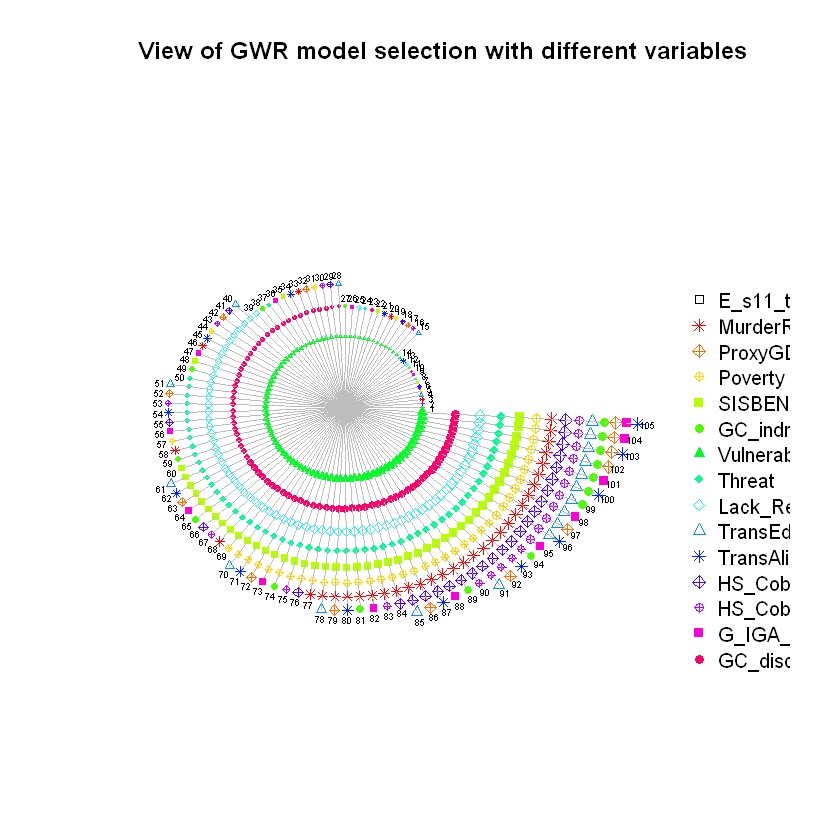

In [6]:
DeVar <- ListVariables[[1]] 
InDeVars <- unlist(ListVariables[2:length(ListVariables)], recursive = TRUE, use.names = FALSE)

model.sel <- model.selection.gwr(DeVar ,InDeVars, data = PolygonShapeTrimmed, 
                                 kernel = "bisquare", adaptive = TRUE, bw = 80) 
sorted.models <- model.sort.gwr(model.sel, numVars = length(InDeVars), 
                                ruler.vector = model.sel[[2]][,2]) 

model.list <- sorted.models[[1]]

model.view.gwr(DeVar, InDeVars, model.list = model.list)

Using the procedure for model selection, the code plots the progression of the modified Akaike Information Criteria as the different models are used. This step can also be omitted if a strong theoretical model is already chosen.

Note that if, when a large number of potential independent variables, the AIC curve flats out at a specific point, the user should check which were the variables that were included in the model before said brake point, and either manually modify the equation, or change the index of the sorted.models list to include only the wanted elements. For instance, if when including 50 variables the modified AIC graph flattens out after 15 variables, the model to be estimated in In [21], In [22], and In [27] should be changed from length(sorted.models[[1]]) to the list index that corresponds to the 15th variable chosen.

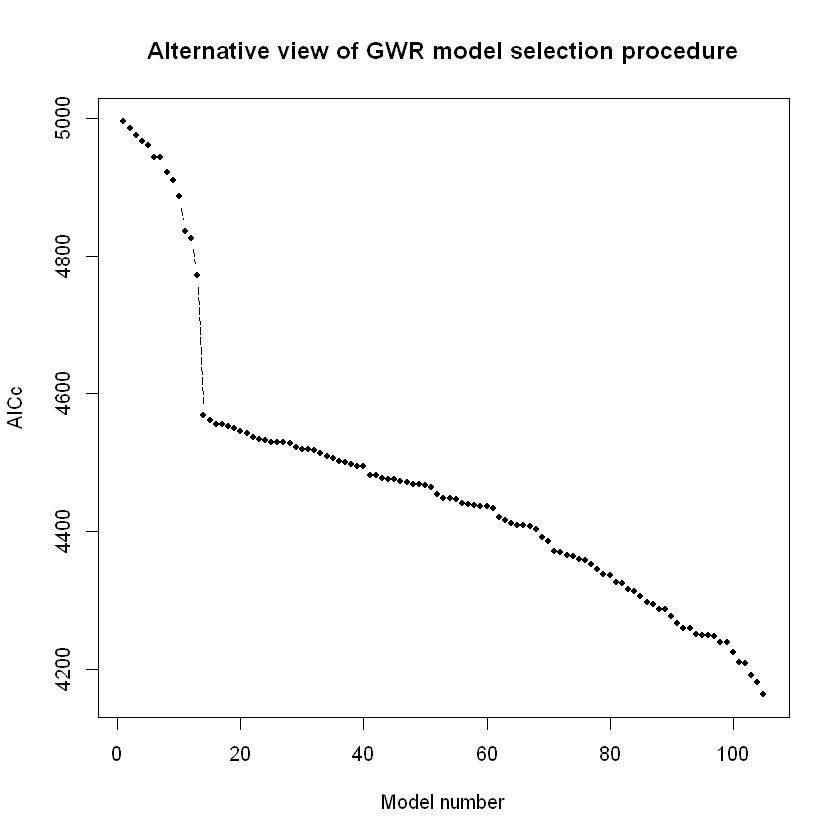

In [7]:
plot(sorted.models[[2]][,2], col = "black", pch = 20, lty = 5, 
     main = "Alternative view of GWR model selection procedure", 
     ylab = "AICc", xlab = "Model number", type = "b")

## 4. Ordinary Least Squares

An initial OLS regression is performed with all the variables specified on the ListVariables list. Remember that the first element of said list should be the dependent variable, while the rest should be independent variables.

In [8]:
attach(PolygonShapeTrimmed@data)
modelOLS <- lm(as.formula(sorted.models[[1]][[length(sorted.models[[1]])]][[1]]))
summary(modelOLS)
tidy_modelOLS <- tidy(modelOLS)
write.csv(tidy_modelOLS, "Tables\\ModelOLS.csv")


Call:
lm(formula = as.formula(sorted.models[[1]][[length(sorted.models[[1]])]][[1]]))

Residuals:
    Min      1Q  Median      3Q     Max 
-7.9422 -1.6557 -0.0638  1.4837 10.8037 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.564e+01  9.593e-01  47.582  < 2e-16 ***
Vulnerabil  -6.474e-01  8.082e-02  -8.010 3.01e-15 ***
GC_discapi   2.757e-04  1.494e-03   0.185   0.8536    
Lack_Respo  -5.360e-02  7.173e-02  -0.747   0.4551    
Threat       1.207e-01  5.724e-02   2.108   0.0353 *  
SISBEN1PC   -1.773e+01  3.871e+00  -4.580 5.20e-06 ***
Poverty      4.197e-02  7.559e-03   5.552 3.56e-08 ***
MurderRate  -1.156e-02  2.808e-03  -4.116 4.15e-05 ***
HS_Cober_7   5.764e-03  3.870e-03   1.489   0.1367    
HS_Cober_1  -5.864e-03  3.409e-03  -1.720   0.0857 .  
TransEducP   5.273e-07  1.091e-06   0.483   0.6289    
GC_indrura   1.367e+00  4.869e-01   2.806   0.0051 ** 
ProxyGDP     3.229e-01  1.293e-01   2.498   0.0127 *  
G_IGA_tota   6.908e-02  9.178e-03 

## 5. Calculating Moran's I

A test for spatial autocorrelation, Moran's I, is performed. Here, the null hypothesis is that there is no spatial autocorrelation. A p-value under 0.05 will reject this hypothesis with a 95% of statistical confidence, in favor of the alternative hypothesis of the existance of spatial autocorrelation for the dependent variable. If this is the case, this means that the user should use GWR instead of OLS, since using OLS in the presence of spatial autocorrelation can lead to bias in the estimation of regression coefficients. 

In [9]:
DependentVariable <- c(ListVariables[[1]])
# MoransIListVariables <- c(ListVariables[[1]])
# MoransIListVariables <- append(MoransIListVariables, "Lat")
# MoransIListVariables <- append(MoransIListVariables, "Long")
PolygonShapeData <- PolygonShapeTrimmed@data
PolygonShapeData.dists <- as.matrix(dist(cbind(PolygonShapeData$Long, PolygonShapeData$Lat)))
PolygonShapeData.dists.inv <- 1/PolygonShapeData.dists
diag(PolygonShapeData.dists.inv) <- 0
Moran.I(PolygonShapeData$E_s11_to_1, PolygonShapeData.dists.inv, na.rm=FALSE)

$observed
[1] 0.1409368

$expected
[1] -0.0009354537

$sd
[1] 0.001783438

$p.value
[1] 0

### Obtaining summary statistics

This code computes a series of geographically weigthed summary statistics (GWSS), using different kernels for the conformation of the proximity matrix. In particular, the one below uses a boxcar distribution, which establishes a weight of 1 for observations where the distribution is within the radius defined by the bandwidth, and 0 otherwise. For more information, search help(gwss).

In [10]:
# gw.ss.bx <- gwss(PolygonShapeTrimmed, PolygonShapeTrimmed, vars = c("E_s11_to_1", "MurderRate", "ProxyGDP", "Poverty"), 
#                  kernel = "boxcar", adaptive = TRUE, bw = 48, quantile = TRUE)
gw.ss.bx <- gwss(PolygonShapeTrimmed, PolygonShapeTrimmed, vars = c(ListVariables), 
                 kernel = "boxcar", adaptive = TRUE, bw = 48, quantile = TRUE)

The same summary statistics are obtained, now using a bi-square distribution, where the weigth of each surrounding observation is equal to (1-(vdist/bw)^2)^2 if the distance to the observation (vdist) is smaller than the bandwidth (bw), and 0 otherwise.

In [11]:
# gw.ss.bs <- gwss(PolygonShapeTrimmed, PolygonShapeTrimmed, vars = c("E_s11_to_1", "MurderRate", "ProxyGDP", "Poverty"), 
#                  kernel = "bisquare", adaptive = TRUE, bw = 48)
gw.ss.bs <- gwss(PolygonShapeTrimmed, PolygonShapeTrimmed, vars = c(ListVariables), 
                 kernel = "bisquare", adaptive = TRUE, bw = 48)

The basic map layout is defined for the visualization of the GWSS.

In [12]:
map.na = list("SpatialPolygonsRescale", layout.north.arrow(),
              offset = c(329000,261500), scale = 4000, col=1)
map.scale.1 = list("SpatialPolygonsRescale", layout.scale.bar(),
                   offset = c(326500,217000), scale = 5000, col=1, fill=c("transparent","blue"))
map.scale.2  = list("sp.text", c(326500,217900), "0", cex=0.9, col=1)
map.scale.3  = list("sp.text", c(331500,217900), "5km", cex=0.9, col=1)
map.layout <- list(map.na,map.scale.1,map.scale.2,map.scale.3)

Three main palettes are chosen, which can be costumized and adjusted as needed. More colors can be chosen from the options presented by inputing display.brewer.all()

In [13]:
mypalette.1 <- brewer.pal(9, "Reds") 
mypalette.2 <- brewer.pal(9, "Blues") 
mypalette.3 <- brewer.pal(9, "Greens")

Preformatted variables are created for a number of variables selected. This can be further expanded if more variables want to be plotted. 

In [14]:
LSD_DepVar <- paste(ListVariables[[1]],"LSD", sep="_")
IQR_DepVar <- paste(ListVariables[[1]],"IQR", sep="_")
CorrDepVarIndVar1 <- paste("Corr",paste(ListVariables[[1]], ListVariables[[2]], sep="."), sep="_")
CorrDepVarIndVar2 <- paste("Corr",paste(ListVariables[[1]], ListVariables[[3]], sep="."), sep="_")
SpeRhoDepVarIndVar1 <- paste("Spearman_rho", paste(ListVariables[[1]], ListVariables[[2]], sep="."), sep="_")
SpeRhoDepVarIndVar3 <- paste("Spearman_rho", paste(ListVariables[[1]], ListVariables[[4]], sep="."), sep="_")

A map is constructed by using the shapefile already loaded into the program, and by using the geographically weigthed standard deviations of the dependent variable. An example using the actual name of the variable, as well as a more evident title for the graph, is presented as a comment. 

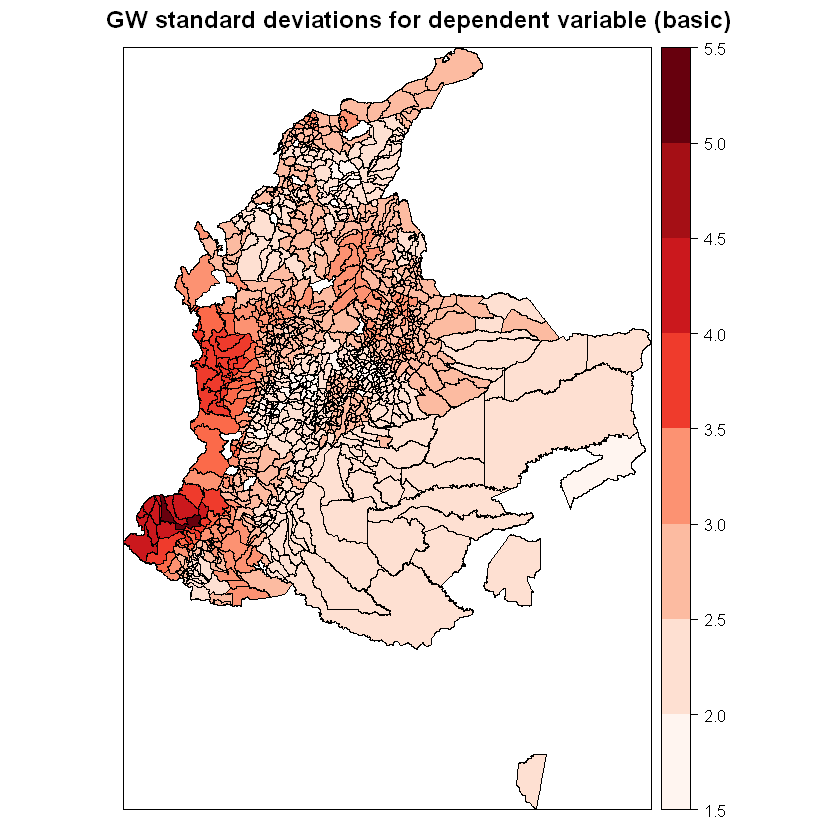

In [15]:
# spplot(gw.ss.bx$SDF, "E_s11_to_1_LSD", key.space = "right", 
#        col.regions = mypalette.1, cuts = 7, 
#        main = "GW standard deviations for SABER11 (basic)", sp.layout = map.layout)
spplot(gw.ss.bx$SDF, LSD_DepVar, key.space = "right", 
       col.regions = mypalette.1, pretty=TRUE, cuts=8,
       main = "GW standard deviations for dependent variable (basic)", sp.layout = map.layout)

The same map is created for the robust geographically weigthed inter-quartile ranges for the dependent variable, with its corresponding example. 

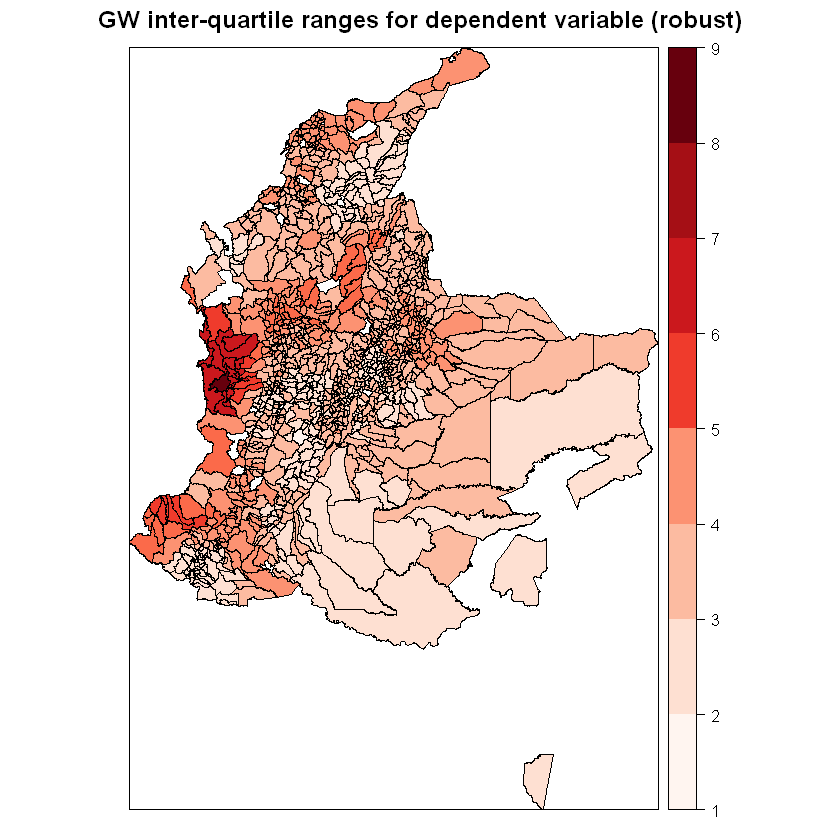

In [16]:
# spplot(gw.ss.bx$SDF, "E_s11_to_1_IQR", key.space = "right", 
#        col.regions = mypalette.1, cuts = 7, 
#        main = "GW inter-quartile ranges for SABER11 (robust)",
#        sp.layout = map.layout)
spplot(gw.ss.bx$SDF, IQR_DepVar, key.space = "right", 
       col.regions = mypalette.1, pretty=TRUE, cuts=8,
       main = "GW inter-quartile ranges for dependent variable (robust)",
       sp.layout = map.layout)



A map of GW correlations is shown between the dependent and the first independent variable, constructed using the box-car kernel described above. 

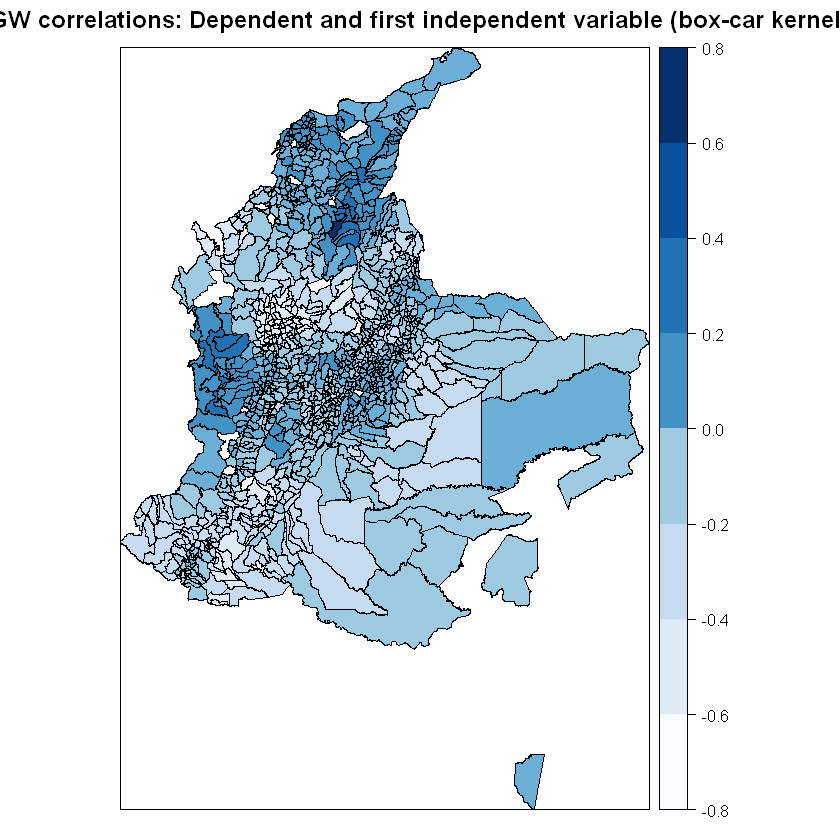

In [17]:
# spplot(gw.ss.bx$SDF, "Corr_E_s11_to_1.MurderRate", key.space = "right", 
#        col.regions = mypalette.2, at = c(-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1), 
#        main = "GW correlations: SABER11 and MurderRate (box-car kernel)", 
#        sp.layout = map.layout)
spplot(gw.ss.bx$SDF, CorrDepVarIndVar1, key.space = "right", 
       col.regions = mypalette.2, pretty=TRUE, cuts=8,
       main = "GW correlations: Dependent and first independent variable (box-car kernel)", 
       sp.layout = map.layout)



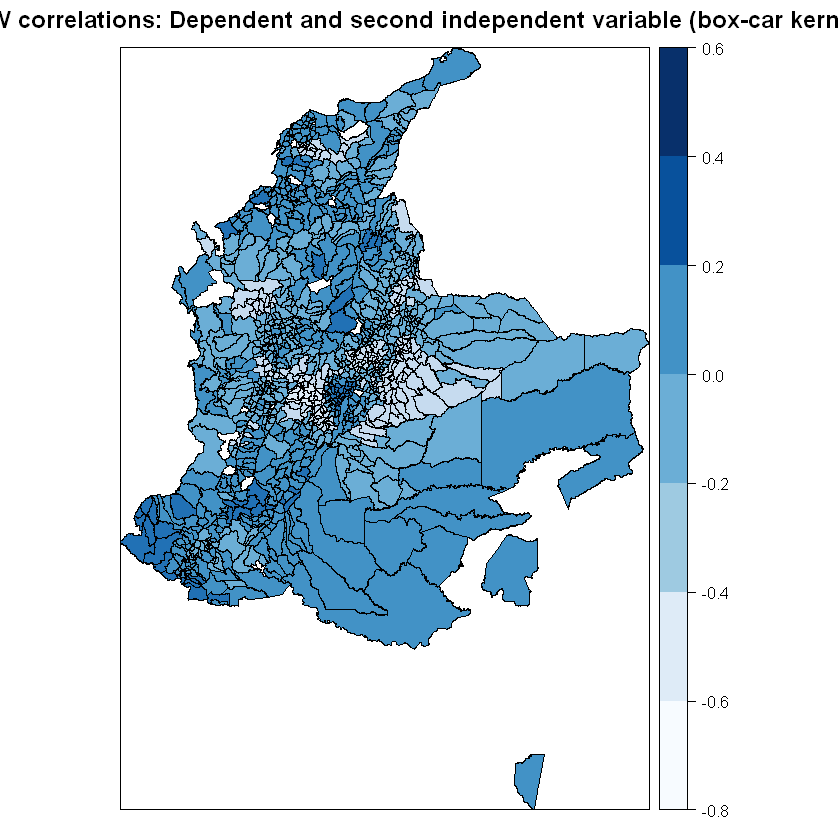

In [18]:
# spplot(gw.ss.bx$SDF, "Corr_E_s11_to_1.ProxyGDP", key.space = "right", 
#        col.regions = mypalette.2, at = c(-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1), 
#        main = "GW correlations: SABER11 and GDP (box-car kernel)", 
#        sp.layout = map.layout)
spplot(gw.ss.bx$SDF, CorrDepVarIndVar2, key.space = "right", 
       col.regions = mypalette.2, pretty=TRUE, cuts=8,
       main = "GW correlations: Dependent and second independent variable (box-car kernel)", 
       sp.layout = map.layout)




The same thing is done using the second independent variable. This can be easily replicated into any type of correlation, be it with more independent variables and the dependent variable, or even between two independent variables. 

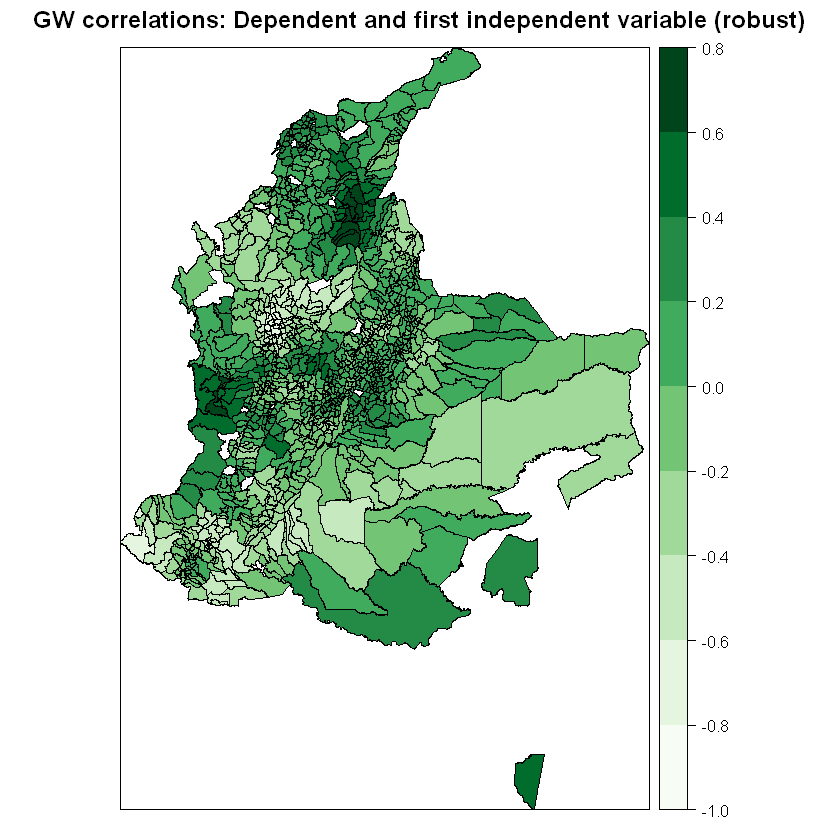

In [19]:
# spplot(gw.ss.bs$SDF, "Spearman_rho_E_s11_to_1.MurderRate",key.space = "right", 
#        col.regions = mypalette.3, at = c(-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1), 
#        main = "GW correlations: SABER11 and Murder rate (robust)", 
#        sp.layout = map.layout)
spplot(gw.ss.bs$SDF, SpeRhoDepVarIndVar1,key.space = "right", 
       col.regions = mypalette.3, pretty=TRUE, cuts=8, 
       main = "GW correlations: Dependent and first independent variable (robust)", 
       sp.layout = map.layout)



Finally, the same is presented between the dependent and the third independent variable. 

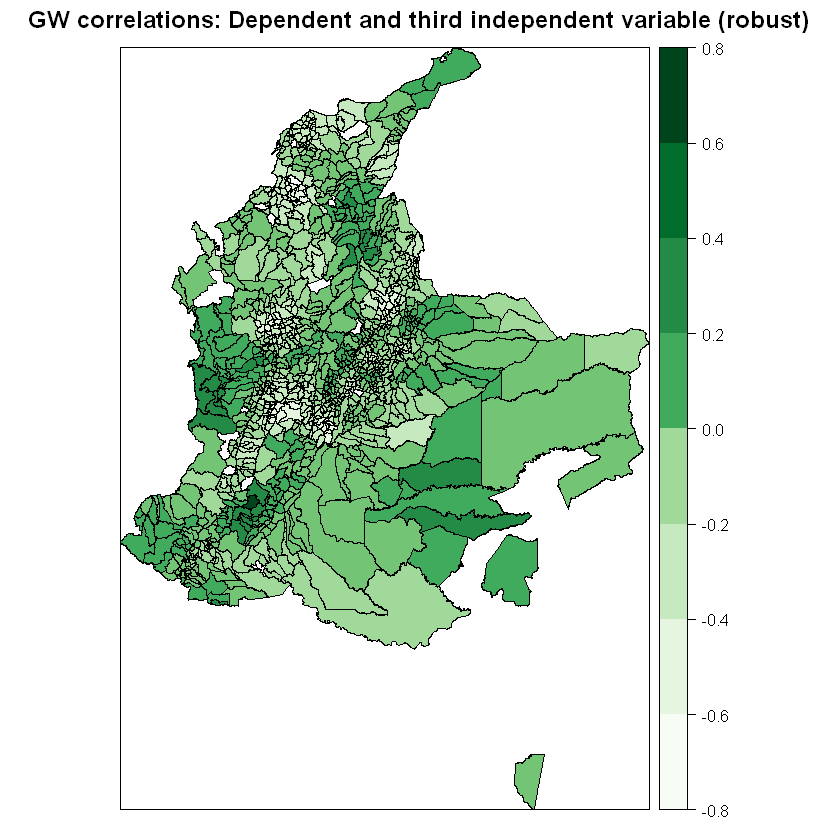

In [20]:
# spplot(gw.ss.bs$SDF, "Spearman_rho_E_s11_to_1.Poverty",key.space = "right", 
#        col.regions = mypalette.3, at = c(-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1), 
#        main = "GW correlations: SABER11 and Poverty (robust)", 
#        sp.layout = map.layout)
spplot(gw.ss.bs$SDF, SpeRhoDepVarIndVar3,key.space = "right", 
       col.regions = mypalette.3, pretty=TRUE, cuts=8, 
       main = "GW correlations: Dependent and third independent variable (robust)", 
       sp.layout = map.layout)

Once the model has been automatically selected through the pseudo stepwise procedure outlined in Figure 1 (and executed in the last two code snipplets), determine the optimal bandwidth for the optimized model. If a strong theoretical model exists, and the last few steps were omitted, replace the corresponding formula on the commented out code snippled at the top.

In [21]:
#bw.gwr.1 <- bw.gwr(whatever_theoretical_model_is_selected, data = PolygonShapeTrimmed, approach = "AICc",
#                   kernel = "bisquare", adaptive = TRUE)
bw.gwr.1 <- bw.gwr(as.formula(sorted.models[[1]][[length(sorted.models[[1]])]][[1]]), data = PolygonShapeTrimmed, approach = "AICc",
                   kernel = "bisquare", adaptive = TRUE)
cat("")
cat("The optimal adaptative bandwidth is equal to ", bw.gwr.1)

Adaptive bandwidth (number of nearest neighbours): 668 AICc value: 4797.465 
Adaptive bandwidth (number of nearest neighbours): 421 AICc value: 4756.648 
Adaptive bandwidth (number of nearest neighbours): 266 AICc value: 4755.709 
Adaptive bandwidth (number of nearest neighbours): 173 AICc value: 4801.078 
Adaptive bandwidth (number of nearest neighbours): 326 AICc value: 4750.123 
Adaptive bandwidth (number of nearest neighbours): 361 AICc value: 4750.819 
Adaptive bandwidth (number of nearest neighbours): 302 AICc value: 4751.859 
Adaptive bandwidth (number of nearest neighbours): 338 AICc value: 4750.386 
Adaptive bandwidth (number of nearest neighbours): 315 AICc value: 4750.466 
Adaptive bandwidth (number of nearest neighbours): 329 AICc value: 4750.222 
Adaptive bandwidth (number of nearest neighbours): 320 AICc value: 4750.076 
Adaptive bandwidth (number of nearest neighbours): 320 AICc value: 4750.076 
The optimal adaptative bandwidth is equal to  320

Once the adaptative bandwidth has been determined, and using the theoretical model determined by the pseudo stepwise procedure above, the Geographically Weighted Regressions are executed. As before, ff a strong theoretical model exists, and the last few steps were omitted, replace the corresponding formula on the commented out code snippled at the top.

Note that the option adaptative can be changes either to TRUE or to FALSE, with the resulting change in the way the regression is estimated. Also note that the kernel has been specified to be bisquare, but can be changed to be a number of possibilities, including gaussian, boxcar, exponential and tricube. 

In [22]:
#gwr.res <- gwr.basic(whatever_theoretical_model_is_selected, data = PolygonShapeTrimmed, bw = bw.gwr.1, 
#                     kernel = "bisquare", adaptive = TRUE, F123.test = TRUE)

gwr.res <- gwr.basic(as.formula(sorted.models[[1]][[length(sorted.models[[1]])]][[1]]), data = PolygonShapeTrimmed, bw = bw.gwr.1, 
                     kernel = "bisquare", adaptive = TRUE, F123.test = TRUE)
gwr.res

   ***********************************************************************
   *                       Package   GWmodel                             *
   ***********************************************************************
   Program starts at: 2020-09-25 17:12:05 
   Call:
   gwr.basic(formula = as.formula(sorted.models[[1]][[length(sorted.models[[1]])]][[1]]), 
    data = PolygonShapeTrimmed, bw = bw.gwr.1, kernel = "bisquare", 
    adaptive = TRUE, F123.test = TRUE)

   Dependent (y) variable:  E_s11_to_1
   Independent variables:  Vulnerabil GC_discapi Lack_Respo Threat SISBEN1PC Poverty MurderRate HS_Cober_7 HS_Cober_1 TransEducP GC_indrura ProxyGDP G_IGA_tota TransAlimE
   Number of data points: 1070
   ***********************************************************************
   *                    Results of Global Regression                     *
   ***********************************************************************

   Call:
    lm(formula = formula, data = data)

   Resi

The names of the results are printed out, in case something wants to be produced with it. These same variables will be exported at the end of the code to a Shapefile, to be plotted and formatted on QGIS. 

In [23]:
writeOGR(gwr.res$SDF, "Data\\Colombia", driver="ESRI Shapefile", layer='Results', overwrite_layer = TRUE)
names(gwr.res$SDF) 

[1] "Intercept"     "Vulnerabil"    "GC_discapi"    "Lack_Respo"   
 [5] "Threat"        "SISBEN1PC"     "Poverty"       "MurderRate"   
 [9] "HS_Cober_7"    "HS_Cober_1"    "TransEducP"    "GC_indrura"   
[13] "ProxyGDP"      "G_IGA_tota"    "TransAlimE"    "y"            
[17] "yhat"          "residual"      "CV_Score"      "Stud_residual"
[21] "Intercept_SE"  "Vulnerabil_SE" "GC_discapi_SE" "Lack_Respo_SE"
[25] "Threat_SE"     "SISBEN1PC_SE"  "Poverty_SE"    "MurderRate_SE"
[29] "HS_Cober_7_SE" "HS_Cober_1_SE" "TransEducP_SE" "GC_indrura_SE"
[33] "ProxyGDP_SE"   "G_IGA_tota_SE" "TransAlimE_SE" "Intercept_TV" 
[37] "Vulnerabil_TV" "GC_discapi_TV" "Lack_Respo_TV" "Threat_TV"    
[41] "SISBEN1PC_TV"  "Poverty_TV"    "MurderRate_TV" "HS_Cober_7_TV"
[45] "HS_Cober_1_TV" "TransEducP_TV" "GC_indrura_TV" "ProxyGDP_TV"  
[49] "G_IGA_tota_TV" "TransAlimE_TV" "Local_R2"

A map of the coefficient estimates for the basic GWR estimation for the first independent variable is presented. An customizable example can be found for the first independent variable. The same thing is done for the other two independent variables in the example provided. 

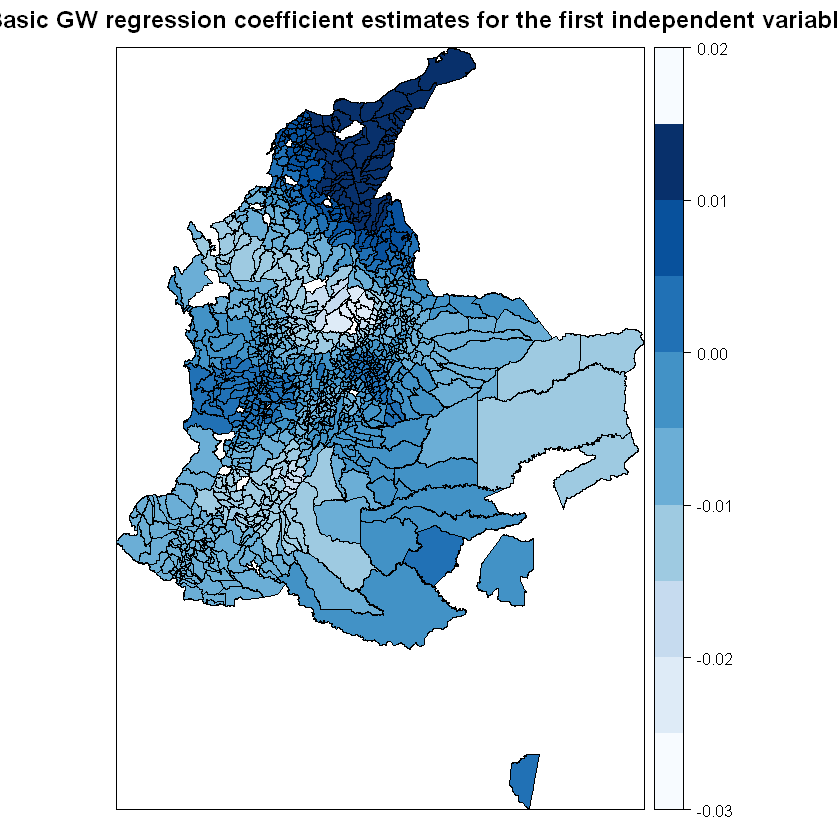

In [24]:
#spplot(gwr.res$SDF, MurderRate, key.space = "right", 
#       col.regions = mypalette.2, pretty=TRUE, cuts=8,
#       main = "Basic GW regression coefficient estimates for murder rates",
#       sp.layout = map.layout)
spplot(gwr.res$SDF, ListVariables[[2]], key.space = "right", 
       col.regions = mypalette.2, pretty=TRUE, cuts=8,
       main = "Basic GW regression coefficient estimates for the first independent variable",
       sp.layout = map.layout)

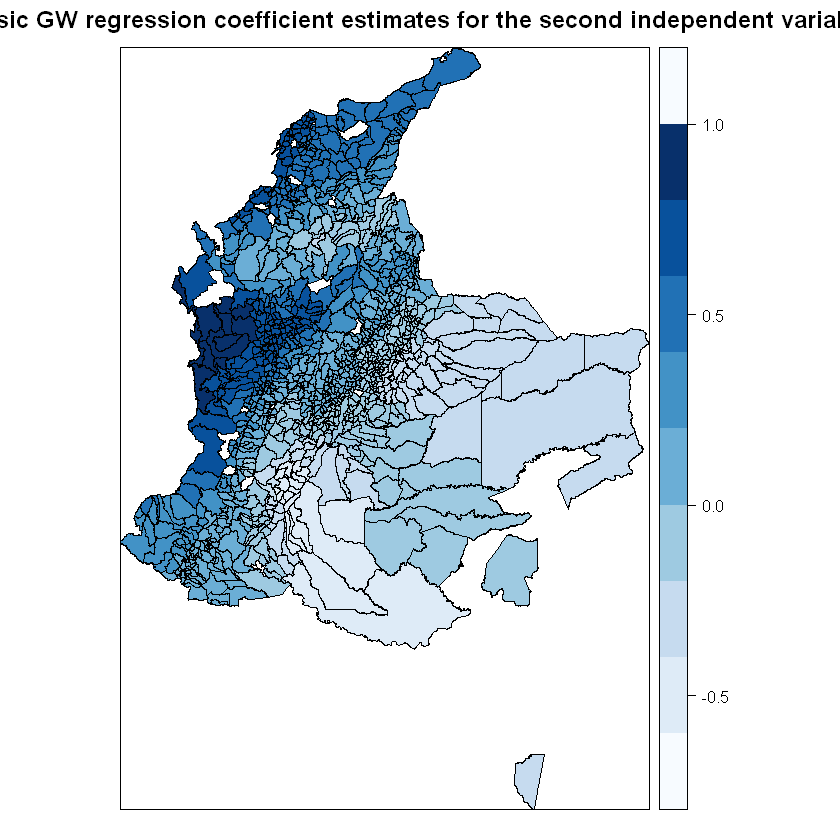

In [25]:
spplot(gwr.res$SDF, ListVariables[[3]], key.space = "right", 
       col.regions = mypalette.2, pretty=TRUE, cuts=8,
       main = "Basic GW regression coefficient estimates for the second independent variable",
       sp.layout = map.layout)

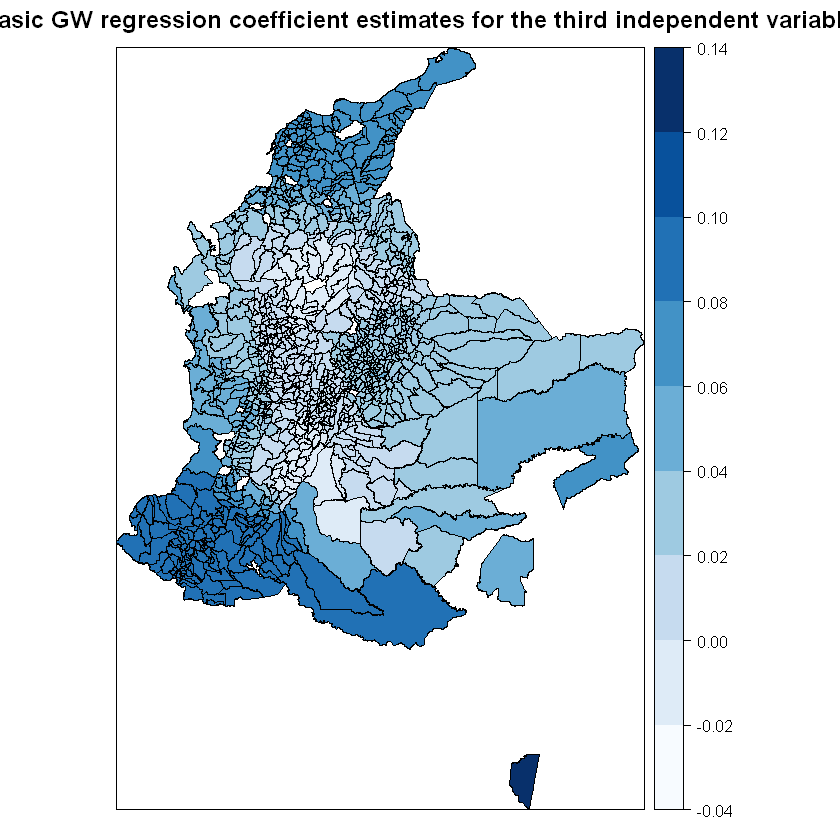

In [26]:
spplot(gwr.res$SDF, ListVariables[[4]], key.space = "right", 
       col.regions = mypalette.2, pretty=TRUE, cuts=8,
       main = "Basic GW regression coefficient estimates for the third independent variable",
       sp.layout = map.layout)

The same GWR regression, now calculating robust estimators, is performed. If the user has a strong model framework, it can be added in the commented out code snipplet. Note that his estimation is computationally expensive and can take a long time.

In [ ]:
#rgwr.res <- gwr.robust(as.formula(sorted.models[[1]][[length(sorted.models[[1]])]][[1]]), data = PolygonShapeTrimmed, bw = bw.gwr.1,
#                       kernel = "bisquare", adaptive = TRUE, F123.test = TRUE)
rgwr.res <- gwr.robust(as.formula(sorted.models[[1]][[length(sorted.models[[1]])]][[1]]), data = PolygonShapeTrimmed, bw = bw.gwr.1,
                       kernel = "bisquare", adaptive = TRUE, F123.test = TRUE)
rgwr.res

The same maps presented above, but now for the robust version of the estimation, are computed below.

In [ ]:
spplot(rgwr.res$SDF, ListVariables[[2]], key.space = "right", 
       col.regions = mypalette.1, pretty=TRUE, cuts=8,
       main = "Robust GW regression coefficient estimates for the first independent variable",
       sp.layout = map.layout)

In [ ]:
spplot(rgwr.res$SDF, ListVariables[[3]], key.space = "right", 
       col.regions = mypalette.2, pretty=TRUE, cuts=8,
       main = "Robust GW regression coefficient estimates for the second independent variable",
       sp.layout = map.layout)

In [ ]:
spplot(rgwr.res$SDF, ListVariables[[4]], key.space = "right", 
       col.regions = mypalette.3, pretty=TRUE, cuts=8,
       main = "Robust GW regression coefficient estimates for the third independent variable",
       sp.layout = map.layout)

Finally, the results from the estimations are exported as an ESRI Shapefile.

In [ ]:
writeOGR(rgwr.res$SDF, "Data\\Colombia", driver="ESRI Shapefile", layer='Results - Robust', overwrite_layer = TRUE)

End of the code.